# 8. Neural networks and deep learning
Th|is week, we'll learn about neural nets and build a model for classifying images of clothes

## 8.1 Fashion classification
Dataset:

- Full: https://github.com/alexeygrigorev/clothing-dataset
- Small: https://github.com/alexeygrigorev/clothing-dataset-small


Links:

- https://cs231n.github.io/

## 8.2 TensorFlow and Keras
- Installing TensorFlow
- Loading images

TensorFlow is a powerful and flexible library for developing and training deep learning models, while Keras is a higher-level API that provides a user-friendly and intuitive interface for building and experimenting with neural networks. Keras is often used with TensorFlow as it simplifies many aspects of model development and makes it easier to create and train deep learning models.

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from tensorflow.keras.preprocessing.image import load_img

In [4]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
fullname

'./clothing-dataset-small/train/t-shirt/5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'

In [6]:
img = load_img(fullname, target_size = (299, 299))
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x20E3D3CE1D0>


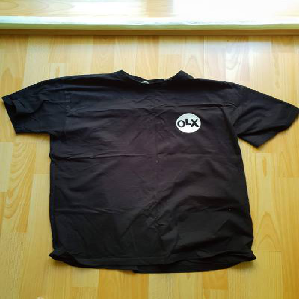

In [7]:
img

In [8]:
np.array(img)

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 253, 248]],

       [[188, 179, 110],
        [187, 178, 109],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 190, 128],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  24],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

In [9]:
x = np.array(img)
print(x.shape)

(299, 299, 3)


- The image has a size of 299 pixels in height and 299 pixels in width, resulting in a total of 299 * 299 = 89,401 pixels.

- Each pixel in the image is described by three color channels, representing the intensity of red (R), green (G), and blue (B) colors. These three channels are used to represent and display the full range of colors in the image.

So, I have an image that is 299 pixels by 299 pixels, and each pixel is described by 3 channels for the RGB color information.

## 8.3 Pre-trained convolutional neural networks
- Imagenet dataset: https://www.image-net.org/
- Pre-trained models: https://keras.io/api/applications/

In [10]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [11]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

Here we are using `Xception` which is a pre-trained model for classifying image. This model is trained based on `imagenet` dataset.

In [12]:
X = np.array([x])

`Xception` expect multiple image. Thats why we have to convert x to the array of images.

In [13]:
X.shape

(1, 299, 299, 3)

In [14]:
X = preprocess_input(X)
X

array([[[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
         [ 0.4039216 ,  0.3411765 , -0.2235294 ],
         [ 0.41960788,  0.35686278, -0.20784312],
         ...,
         [ 0.96862745,  0.9843137 ,  0.94509804],
         [ 0.96862745,  0.9843137 ,  0.94509804],
         [ 0.96862745,  0.9843137 ,  0.94509804]],

        [[ 0.47450984,  0.4039216 , -0.1372549 ],
         [ 0.4666667 ,  0.39607847, -0.14509803],
         [ 0.45882356,  0.38823533, -0.15294117],
         ...,
         [ 0.96862745,  0.9764706 ,  0.9372549 ],
         [ 0.96862745,  0.9764706 ,  0.9372549 ],
         [ 0.96862745,  0.9764706 ,  0.92941177]],

        [[ 0.56078434,  0.48235297, -0.00392157],
         [ 0.5686275 ,  0.4901961 ,  0.00392163],
         [ 0.5686275 ,  0.4901961 ,  0.00392163],
         ...,
         [ 0.9607843 ,  0.96862745,  0.92156863],
         [ 0.9607843 ,  0.96862745,  0.92156863],
         [ 0.9607843 ,  0.96862745,  0.92156863]],

        ...,

        [[ 0.2941177 ,  0.18431377, -0

We have to preprocess out data(X) before pass it to the model to make prediction.

In [15]:
pred = model.predict(X)
pred

1/1 [==============================] - 1s 1s/step


array([[3.23798158e-04, 1.57364557e-04, 2.14056185e-04, 1.52957611e-04,
        2.46566167e-04, 3.04462883e-04, 3.23487970e-04, 1.47259736e-04,
        2.04866214e-04, 1.48656516e-04, 1.95694360e-04, 2.11569437e-04,
        7.61279589e-05, 1.14591756e-04, 1.64077806e-04, 2.07021716e-04,
        1.96368317e-04, 1.44514939e-04, 1.40078831e-04, 1.73651933e-04,
        7.50313397e-04, 2.55689025e-04, 2.66563176e-04, 2.96250248e-04,
        3.71849426e-04, 2.81153742e-04, 2.16760018e-04, 2.26841934e-04,
        3.82646685e-04, 1.72123371e-04, 3.08604445e-04, 1.97759786e-04,
        3.93642375e-04, 4.78196598e-04, 2.90634838e-04, 3.26480775e-04,
        1.47040395e-04, 1.63522171e-04, 2.14072934e-04, 1.34214963e-04,
        2.41730377e-04, 6.72482944e-04, 2.53320031e-04, 1.42904319e-04,
        4.11026471e-04, 2.05692559e-04, 3.04203131e-04, 1.49993852e-04,
        2.00595503e-04, 2.28325182e-04, 2.97197228e-04, 2.30767328e-04,
        6.29547052e-04, 7.80996750e-04, 2.47868506e-04, 4.030107

There are many class of images. Every probability refers to the probability of the image to fall in that particular class.

In [16]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.67924464),
  ('n02916936', 'bulletproof_vest', 0.039600383),
  ('n04370456', 'sweatshirt', 0.03529959),
  ('n03710637', 'maillot', 0.010884146),
  ('n04525038', 'velvet', 0.0018057626)]]

Now we have to decode the predictions. It determines the top 5 predicted class.

## 8.4 Convolutional neural networks
- Types of layers: convolutional and dense
- Convolutional layers and filters
- Dense layers
- There are more layers. Read here: https://cs231n.github.io/

## 8.5 Transfer learning
- Reading data with `ImageDataGenerator`
- Train Xception on smaller images (150x150)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [19]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [20]:
X, y = next(train_ds)

In [21]:
X.shape, y.shape

((32, 150, 150, 3), (32, 10))

In [22]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [23]:
y[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation/',
    target_size=(150, 150),
    batch_size=32,
    shuffle = False
)

Found 341 images belonging to 10 classes.


#### Base model
Here we only take the convolutional Layers of `Xception` model which is developed based on `ImageNet`.
- `include_top = False`: This means, we only take the CLs. Exclude DLs
- `base_model.trainable = False`: This means, we use the model `Xception` for extracting features only. We don't need to train. Using the CLs of `Xception` we extract vector representation of features
- `base_model` extract the vector representation.

In [25]:
base_model = Xception(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150, 150, 3)
)

base_model.trainable = False

In [26]:
# Base Model (Xception)
base_model = Xception(
    weights = 'imagenet',  # Pre-trained weights from ImageNet
    include_top = False,    # Exclude top (classification) layers
    input_shape = (150, 150, 3)  # Input image shape
)

# Freeze the Base Model
base_model.trainable = False  # Freeze the convolutional layers

# Inputs
inputs = keras.Input(shape=(150, 150, 3))  # Define the input shape

# Base Model as Feature Extractor
base = base_model(inputs, training = False)
# Use the base model for feature extraction, not training

# Global Average Pooling Layer
vectors = keras.layers.GlobalAveragePooling2D()(base)
# Convert the 3D feature maps to a 1D feature vector

# Custom Dense Layer (Output Layer)
outputs = keras.layers.Dense(10)(vectors)
# Create a dense layer for classification with 10 classes

# Model Definition
model = keras.Model(inputs, outputs)
# Define the complete neural network model for training and inference


In [27]:
preds = model.predict(X) # which is the output of the model we created
preds.shape

1/1 [==============================] - 1s 1s/step


(32, 10)

In [28]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [85]:
history = model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
96/96 [==============================] - 95s 961ms/step - loss: 1.2556 - accuracy: 0.6666 - val_loss: 1.0104 - val_accuracy: 0.7302
Epoch 2/5
96/96 [==============================] - 97s 1s/step - loss: 0.6112 - accuracy: 0.8214 - val_loss: 0.8207 - val_accuracy: 0.7683
Epoch 3/5
96/96 [==============================] - 99s 1s/step - loss: 0.3892 - accuracy: 0.8787 - val_loss: 0.8640 - val_accuracy: 0.8035
Epoch 4/5
96/96 [==============================] - 100s 1s/step - loss: 0.2430 - accuracy: 0.9175 - val_loss: 0.9072 - val_accuracy: 0.7801
Epoch 5/5
96/96 [==============================] - 102s 1s/step - loss: 0.1575 - accuracy: 0.9430 - val_loss: 0.9489 - val_accuracy: 0.7977


#### Optimizer

The optimizer adjusts the model's weights during training to find the best set of parameters that minimize the loss. Adam is one of the optimization algorithms used for this purpose, and it iteratively updates the weights to converge towards an optimal solution.

#### learning_rate

The learning rate determines the step size of weight updates during training. It's similar in concept to the "eta" parameter in algorithms like XGBoost.

#### loss

Optimizer changes the weight. Now how does it check if the modified weights give better results or not? Loss tells us how good the model is.

The loss function quantifies how well the model's predictions match the actual target values. It serves as a measure of the model's performance. For multi-class classification problems, Categorical Cross entropy is a common choice for the loss function. It calculates the error between predicted class probabilities and the actual class labels.

#### from_logits

The dense layer generates the raw score for each class. Then softmax takes these raw scores and converts them to probabilities for each group. If `from_logits=True`, we want the raw scores as output. Softmax won't be applied.

#### epochs

Total number of iteration over the training data. Setting `epochs = 10` means that you will train your model by iterating through the entire training dataset 10 times.


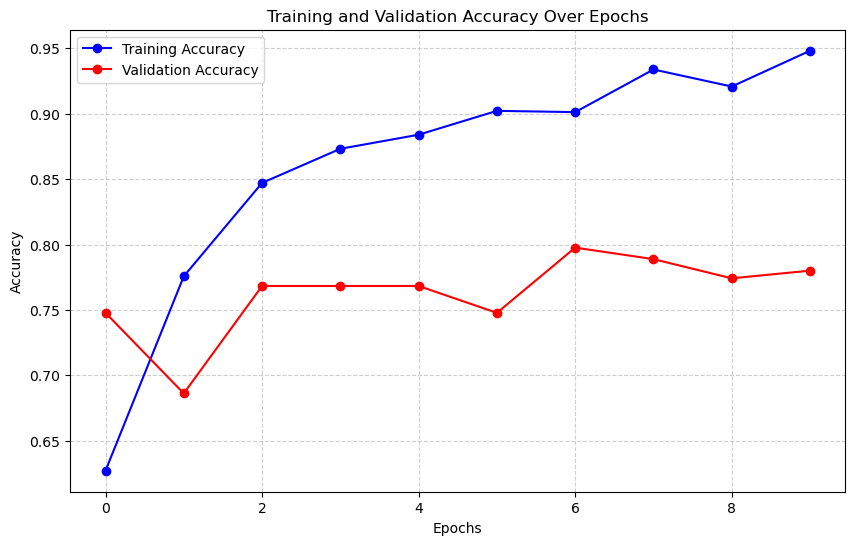

In [31]:
plt.figure(figsize=(10, 6))

# Plot training accuracy
plt.plot(history.history['accuracy'],
         label='Training Accuracy',
         linestyle='-',
         marker='o',
         color='b')

# Plot validation accuracy
plt.plot(history.history['val_accuracy'],
         label='Validation Accuracy',
         linestyle='-',
         marker='o',
         color='r')

# Set plot labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')

# Add a grid
plt.grid(True, linestyle='--', alpha=0.6)

# Add a legend
plt.legend(loc='best')

# Show the plot
# plt.show()

## 8.6 Adjusting the learning rate
- What's the learning rate
- Trying different values

In [26]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [30]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=1, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
96/96 [==============================] - 101s 1s/step - loss: 2.0806 - accuracy: 0.2956 - val_loss: 1.6881 - val_accuracy: 0.4457


0.001
96/96 [==============================] - 102s 1s/step - loss: 1.1058 - accuracy: 0.6222 - val_loss: 0.7418 - val_accuracy: 0.7507


0.01
11/96 [==>...........................] - ETA: 1:19 - loss: 2.7732 - accuracy: 0.4659

KeyboardInterrupt: 

In [34]:
del scores[0.0001]
del scores[0.1]

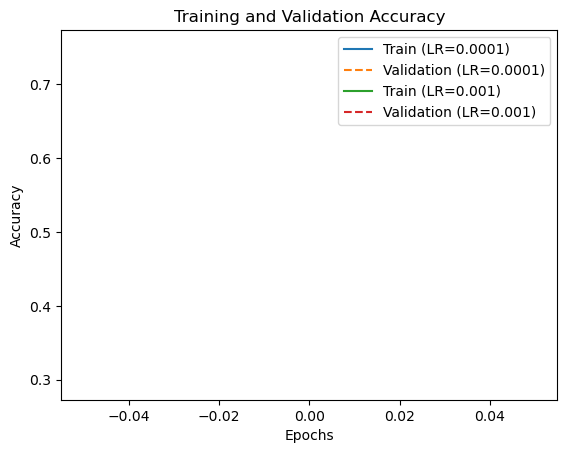

In [31]:
# Iterate over learning rates and their corresponding histories
for lr, hist in scores.items():
    # Plot training accuracy
    plt.plot(hist['accuracy'], label=f'Train (LR={lr})')

    # Plot validation accuracy
    plt.plot(hist['val_accuracy'], label=f'Validation (LR={lr})', linestyle='--')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Show the plot
plt.show()

## 8.7 Checkpointing
- Saving the best model only
- Training a model with callbacks

We can save the model after each iteration when certain condition is meet. We can do this using checkpoint.

In [36]:
model.save_weights('model_v1.h5', save_format = 'h5')

In [37]:
'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'.format(
    epoch = 23,
    val_accuracy = .453
)

'xception_v1_23_0.453.h5'

In [38]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

- `save_best_only = True:` When the model perform better than the previous model, then we save the model,
- `mode = max:` We want the validation accuracy to be maximize
- `monitor = val_accuracy:` If the `val_accuracy` at the end of an epoch is higher than the previous best accuracy (i.e., the maximum `val_accuracy` seen so far), the callback saves the model's weights to a file with the specified format, which includes the epoch number and validation accuracy.

In [39]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/10
96/96 [==============================] - 119s 1s/step - loss: 1.1560 - accuracy: 0.6180 - val_loss: 0.7324 - val_accuracy: 0.7625
Epoch 2/10
96/96 [==============================] - 119s 1s/step - loss: 0.6415 - accuracy: 0.7829 - val_loss: 0.6216 - val_accuracy: 0.8065
Epoch 3/10
96/96 [==============================] - 126s 1s/step - loss: 0.5149 - accuracy: 0.8250 - val_loss: 0.5812 - val_accuracy: 0.8211
Epoch 4/10
96/96 [==============================] - 132s 1s/step - loss: 0.4369 - accuracy: 0.8592 - val_loss: 0.5474 - val_accuracy: 0.8240
Epoch 5/10
96/96 [==============================] - 140s 1s/step - loss: 0.3764 - accuracy: 0.8882 - val_loss: 0.5397 - val_accuracy: 0.8182
Epoch 6/10
96/96 [==============================] - 134s 1s/step - loss: 0.3279 - accuracy: 0.9097 - val_loss: 0.5368 - val_accuracy: 0.8328
Epoch 7/10
96/96 [==============================] - 126s 1s/step - loss: 0.2941 - accuracy: 0.9188 - val_loss: 0.5294 - val_accuracy: 0.8211
Epoch 8/10
96

In [40]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [45]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10


100


1000




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


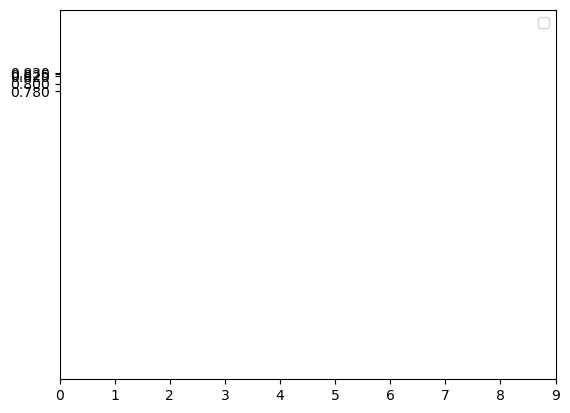

In [46]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()